# <center>TP Nro 2: Aplicaciones de la DFT 2021 1C </center>
### Alumno: Franco Rébora 

En la celda a continuación, se importan las librerias usadas a lo largo del trabajo. En el caso del módulo llamado dsp, se refiere al archivo 'dsp.py' que se encuentra en la misma carpeta del Notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal.windows import windows
from scipy.signal import fftconvolve
from dsp import mediamovildr

---

## <u>Ejercicio 1</u>:
Dada la señal discreta, x(t) de un 1 segundo de duración, compuesta por tres funciones $x1(t)+x2(t)+x3(t)$ que se reescriben a continuación, y muestreada a Fs = 44.1 kHz:

$x_1 (t) = 2$ \
$x_2 (t) = cos(2 \pi f_2 t) e^{- \frac{(t-\mu_2)^2}{2\sigma_2^2}}\;\;\;\;\;\;\;\;f_2 = 10kHz$ $\mu_2 = 0.2s$ $\sigma_2 = 0.05s$ \
$x_3 (t) = sen(2 \pi f_3 t) e^{- \frac{(t-\mu_3)^2}{2\sigma_3^2}}\;\;\;\;\;\;\;\;f_3 = 10.1kHz$ $\mu_3 = 0.7s$ $\sigma_3 = 0.07s$

Graficar la magnitud (en escala lineal y en dB) y la fase de la transformada de Fourier (DFT) de la señal total. Indicar qué representan las componentes no nulas. El eje de frecuencia debe estar en Hz.

## <u>Respuesta</u>: 

#### Generacion de la senal x(t)

In [2]:
# Duracion y frecuencia de muestreo
time = 1
fs = 44100
vector_t = np.linspace(0,time,time*fs)

# Parametros de cada senal
f2 = 10000
mu2 = 0.2
sigma2 = 0.05

f3 = 10100
mu3 = 0.7
sigma3 = 0.07

exp2 = ((vector_t-mu2)**2)/(2*(sigma2**2))
exp3 = ((vector_t-mu3)**2)/(2*(sigma3**2))

x1 = 2*np.ones_like(vector_t)
x2 = np.cos(2*np.pi*f2*vector_t)*(np.e**(-exp2))
x3 = np.sin(2*np.pi*f3*vector_t)*(np.e**(-exp3))
x = x1+x2+x3

In [3]:
# Implementacion de Scipy de la FFT
fft_x = fft(x)
freqs_x = fftfreq(time*fs, 1/fs)

# Recortando las frecuencias utiles
fft_x = fft_x[0:(time*fs)//2]
freqs_x = freqs_x[0:(time*fs)//2]

# En dBFS
valueDBFS = 20*np.log10(abs(fft_x)/max(abs(fft_x)))

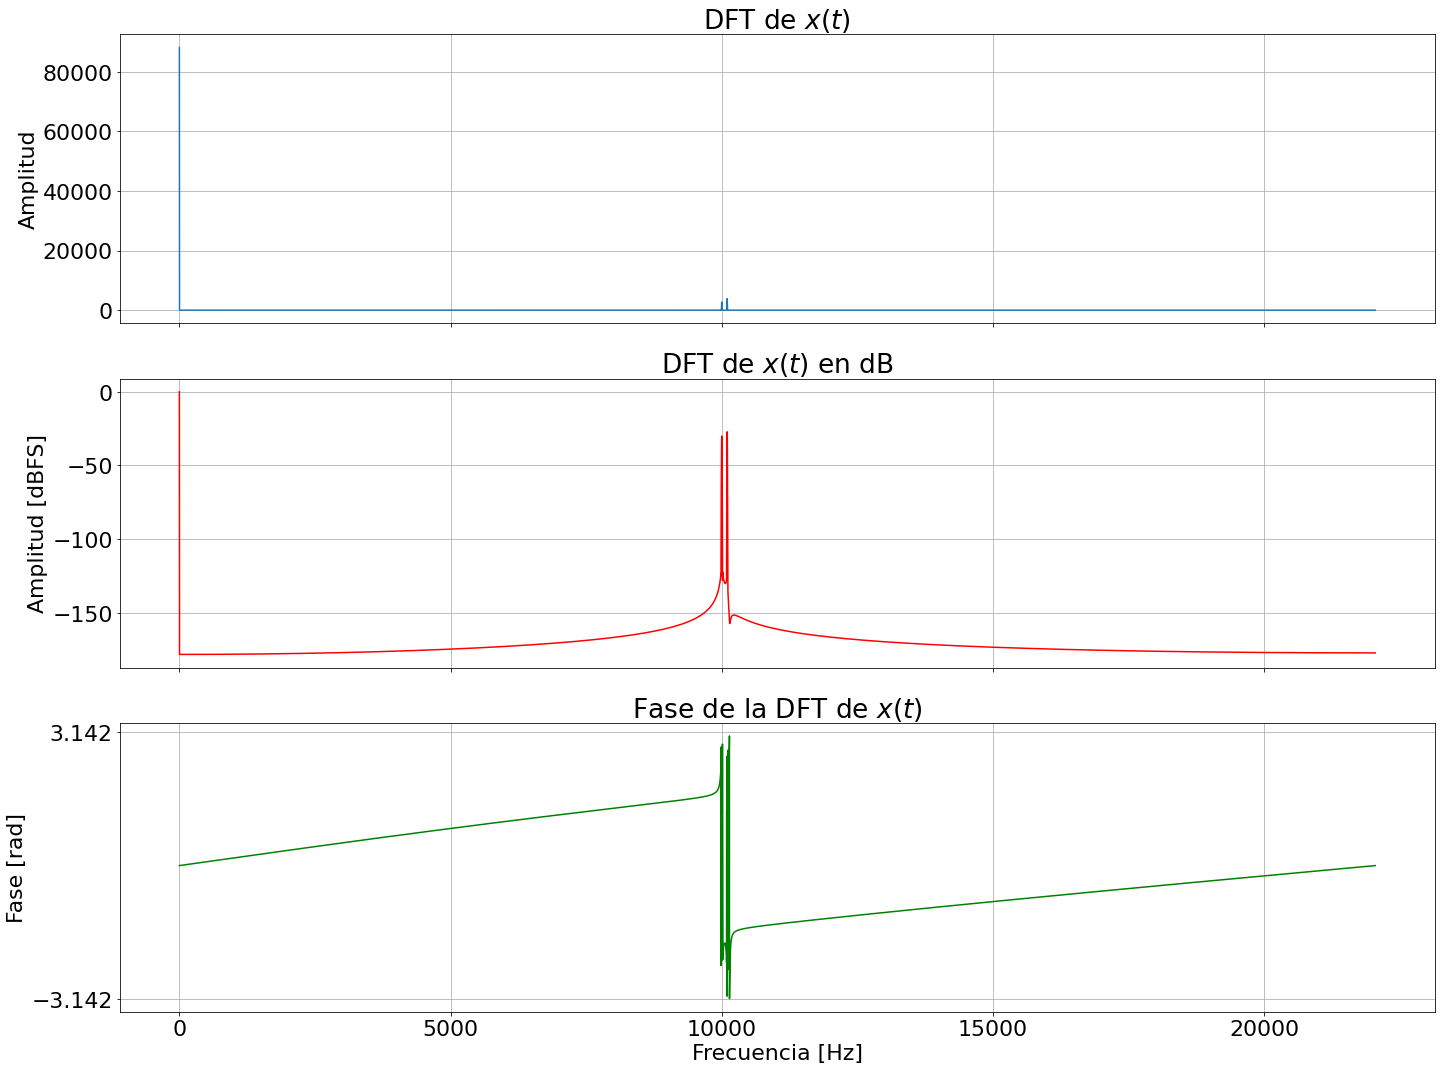

In [4]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(3, 1, sharex=True, figsize=[20, 15])
axs[0].plot(freqs_x, np.abs(fft_x))
axs[0].set_title('DFT de $x(t)$')
axs[1].plot(freqs_x, valueDBFS, color='red')
axs[1].set_title('DFT de $x(t)$ en dB')
axs[2].plot(freqs_x, np.angle(fft_x), color='green')
axs[2].set_title('Fase de la DFT de $x(t)$')

fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud')
axs.flat[1].set(ylabel='Amplitud [dBFS]')
axs.flat[2].set(ylabel='Fase [rad]', xlabel='Frecuencia [Hz]', yticks=(-np.pi,np.pi))

for ax in axs.flat:
    ax.grid()
    
plt.show()

#### Conclusion:

---

## Uso de ventanas
### <u>Ejercicio 2</u>:
La señal del inciso 1 se modificará cambiando la frecuencia de $x_3(t)$, siendo el nuevo valor $f_3 = 10008.37 Hz$, y además se le sumará una componente de ruido aleatorio (normal) $r(t)$, quedando la señal total $x_1(t)+x_2(t)+x_3(t)+ r(t)$, también de 1 segundo de duración y muestreada a Fs = 44.1 kHz:

$x_1 (t) = 2$ \
$x_2 (t) = cos(2 \pi f_2 t) e^{- \frac{(t-\mu_2)^2}{2\sigma_2^2}}\;\;\;\;\;\;\;\;f_2 = 10kHz$&emsp;$\mu_2 = 0.2s$&emsp;$\sigma_2 = 0.05s$ \
$x_3 (t) = sen(2 \pi f_3 t) e^{- \frac{(t-\mu_3)^2}{2\sigma_3^2}}\;\;\;\;\;\;\;\;f_3 = 10008.37Hz$&emsp;$\mu_3 = 0.7s$&emsp;$\sigma_3 = 0.07s$ 

$r(t) =$ ruido aleatorio normal

Graficar la magnitud transformada de Fourier (DFT) de la señal total utilizando tres ventanas diferentes: Rectangular, Hann y Blackman. La señal debe multiplicarse por la ventana antes del cálculo de la DFT. Además, graficar en escala de dB la DFT de cada una de las ventanas, y comparar el ancho del lóbulo principal y la atenuación. Determinar cuál ventana elegirían para diferenciar las componentes de frecuencia (10000 y 10008.37 Hz) y por qué. ¿Cambiarían algún
otro parámetro en el cálculo de la DFT para mejorar la resolución?

## <u>Respuesta</u>: 

In [5]:
# Generacion de la senal x3 para este ejercicio
f3_ej2 = 10008.37
x3_ej2 = np.sin(2*np.pi*f3_ej2*vector_t)*(np.e**(-exp3))

# Generacion de ruido
noise = 0.01*np.random.normal(0,1,fs*time)

x_ej2 = x3_ej2 + noise

#### Generacion de ventanas:

In [6]:
# Generacion de ventanas
window_len = 44100
rectangular = windows.boxcar(window_len)
hann = windows.hann(window_len)
blackman = windows.blackman(window_len)

# Calculo de DFT de la senal ventaneada y longitud de la FFT (para cambiar el grafico)
fft_length = 44100
dft_rectangular = fft(rectangular,fft_length)
dft_hann = fft(hann,fft_length)
dft_blackman = fft(blackman,fft_length)

# Recortando las frecuencias utiles
#dft_rectangular = dft_rectangular[0:(time*fs)//2]
#dft_hann = dft_hann[0:(time*fs)//2]
#dft_blackman = dft_blackman[0:(time*fs)//2]

# Convertir a dB:
dft_rectangular = 20 * np.log10(np.maximum(np.abs(dft_rectangular), 1e-10))
dft_hann = 20 * np.log10(np.maximum(np.abs(dft_hann), 1e-10))
dft_blackman = 20 * np.log10(np.maximum(np.abs(dft_blackman), 1e-10))

#### Plot de la magnitud  de la transformada de Fourier (DFT) utilizando las tres ventanas:
Se varia la longitud de la fft para lograr un grafico mas suave en terminos visuales. Cabe aclarar que la resolucion en frecuencia no depende de este parametro.

In [7]:
# Calculo de DFT de la senal ventaneada
fft_length2 = fs + 10000

xej2_rectangular = x_ej2*rectangular
xej2_hann = x_ej2*hann
xej2_blackman = x_ej2*blackman

dft_xrectangular = np.fft.rfft(x_ej2*rectangular,fft_length2)
dft_xhann = np.fft.rfft(x_ej2*hann,fft_length2)
dft_xblackman = np.fft.rfft(x_ej2*blackman,fft_length2)

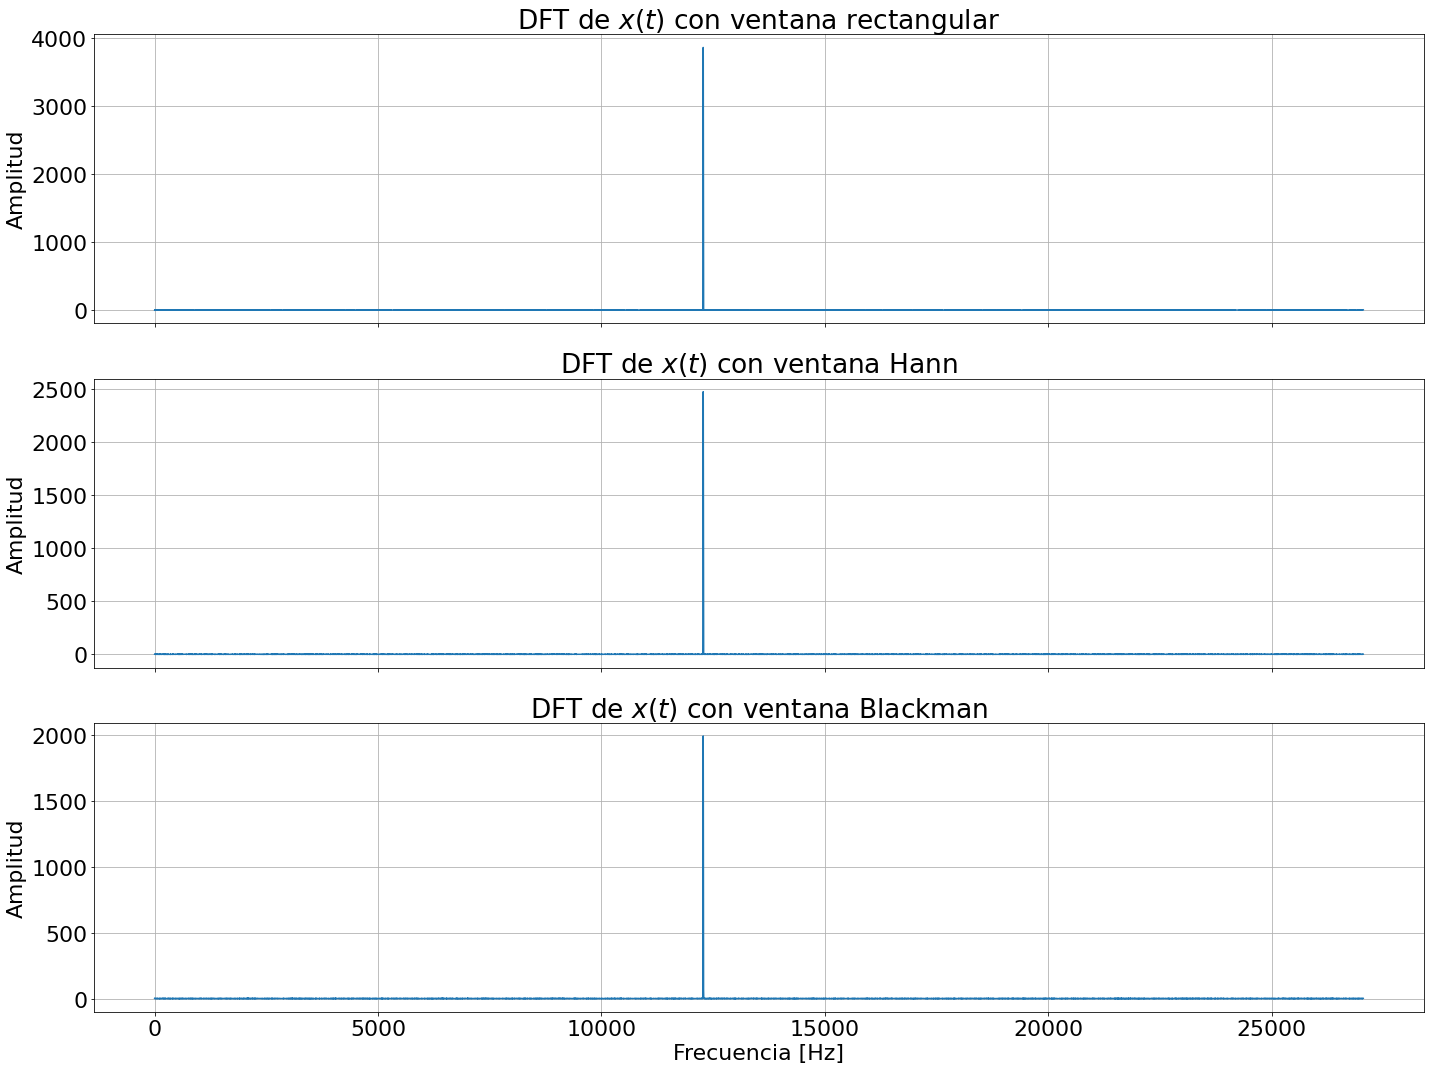

In [8]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(3, 1, sharex=True, figsize=[20, 15])
axs[0].plot(np.abs(dft_xrectangular))
axs[0].set_title('DFT de $x(t)$ con ventana rectangular')
axs[1].plot(np.abs(dft_xhann))
axs[1].set_title('DFT de $x(t)$ con ventana Hann')
axs[2].plot(np.abs(dft_xblackman))
axs[2].set_title('DFT de $x(t)$ con ventana Blackman')

fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud')
axs.flat[1].set(ylabel='Amplitud')
axs.flat[2].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')

for ax in axs.flat:
    ax.grid()
plt.show()

---

#### DFT de las ventanas:

[None, None, None]

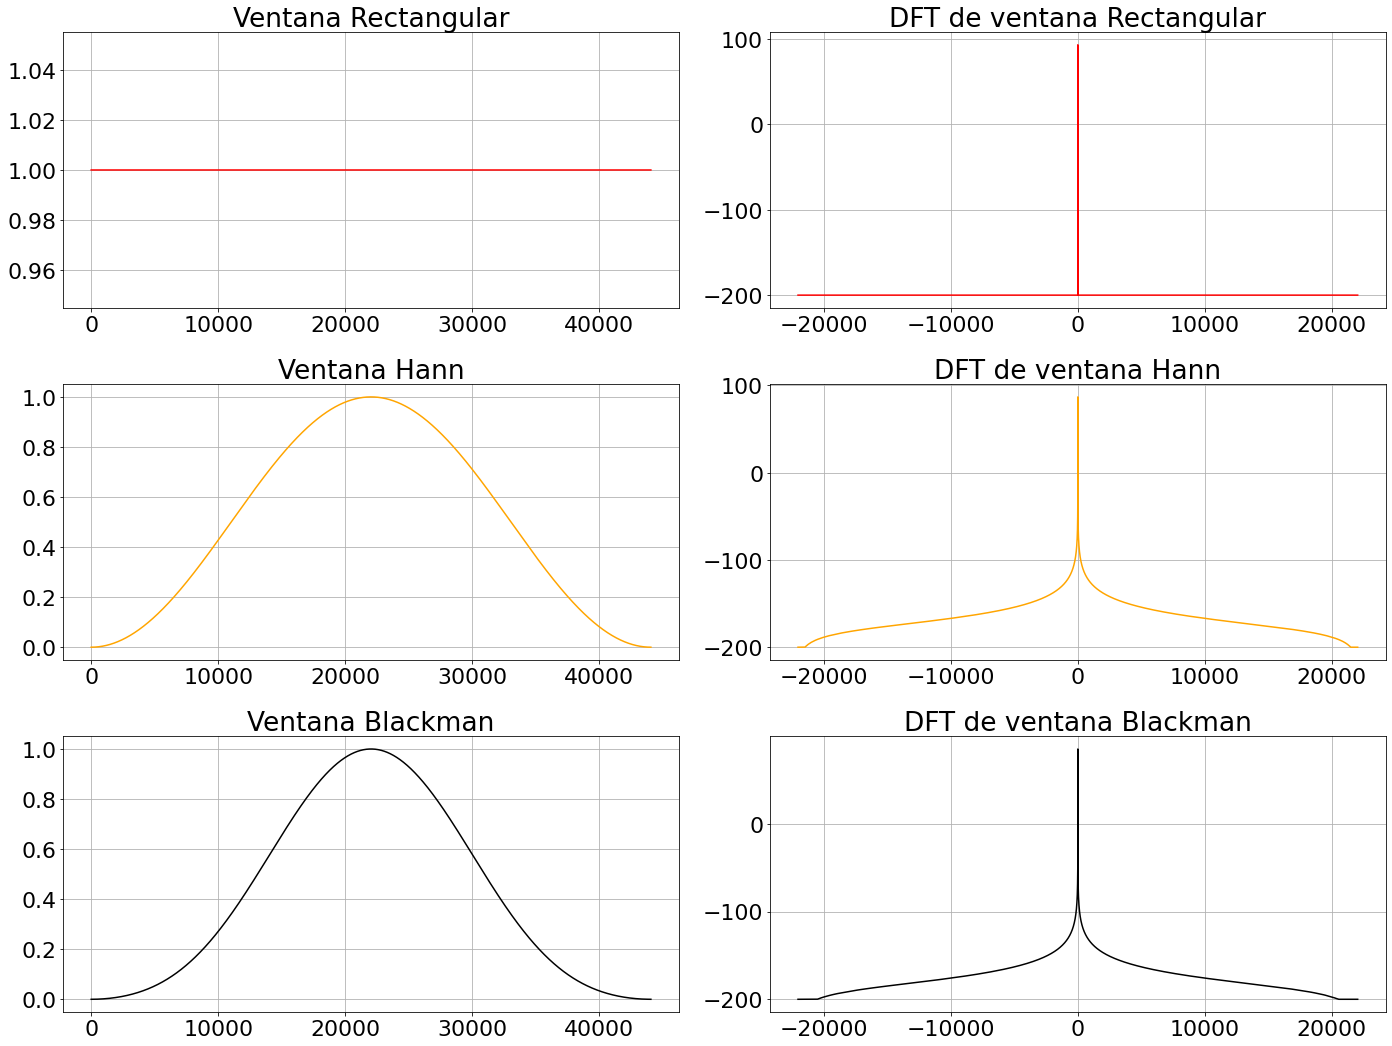

In [9]:
freqs = fftfreq(time*fft_length, 1/fft_length)

fig, ax = plt.subplots(3,2, figsize=[20,15])
ax[0,0].plot(rectangular, color='red')
ax[0,1].plot(np.arange(-fft_length/2,fft_length/2), fftshift(dft_rectangular), color='red')
ax[1,0].plot(hann, color='orange')
ax[1,1].plot(np.arange(-fft_length/2,fft_length/2), fftshift(dft_hann), color='orange')
ax[2,0].plot(blackman, color='black')
ax[2,1].plot(np.arange(-fft_length/2,fft_length/2), fftshift(dft_blackman), color='black')

ax[0,0].set_title('Ventana Rectangular')
ax[0,1].set_title('DFT de ventana Rectangular')
ax[1,0].set_title('Ventana Hann')
ax[1,1].set_title('DFT de ventana Hann')
ax[2,0].set_title('Ventana Blackman')
ax[2,1].set_title('DFT de ventana Blackman')

fig.tight_layout()
[ax[i,0].grid() for i in range(3)]
[ax[i,1].grid() for i in range(3)]

## Interpolación cuadrática
### <u>Ejercicio 3</u>:
Ahora, nos quedaremos con la componente $x_3(t)$ del inciso anterior para implementar una interpolación que mejore la resolución en frecuencia del máximo de la DFT. La señal será entonces de 1 segundo de duración y muestreada a Fs = 44.1 kHz:<br><br>

<center>$x_3 (t) = sen(2 \pi f_3 t) e^{- \frac{(t-\mu_3)^2}{2\sigma_3^2}}\;\;\;\;\;\;\;\;f_3 = 10008.37Hz$&emsp;$\mu_3 = 0.7s$&emsp;$\sigma_3 = 0.07s$ 


Se deberá graficar la magnitud, expresada en dB, de la DFT de la señal $x_3(t$) y se determinará la frecuencia a la que se detecta el máximo de la magnitud, verificándose que no es la frecuencia exacta. En casos como este, en donde la resolución no es suficiente para discriminar el valor de una componente de frecuencia, se puede mejorar la determinación de la posición mediante técnicas de interpolación. Una de las más simples, pero efectivas, es utilizar la interpolación cuadrática que se calcula con la siguiente ecuación: <br><br>

<center> $\hat{n}_{max} = n_{max} + \frac{\alpha - \gamma}{2(\alpha - 2\beta + \gamma)}$

En donde,\
nmax : posición encontrada del punto máximo.\
β = g[nmax] valor absoluto de la magnitud en dB en la posición máxima nmax del pico. \
α = g[nmax-1] valor absoluto de la magnitud en dB en la posición anterior al máximo del pico. \
γ = g[nmax+1] valor absoluto de la magnitud en dB en la posición posterior al máximo del pico.


**Nota:** esta ecuación está definida para un intervalo unitario (muestreo o resolución). Si dicho valor no es 1, debe multiplicarse el valor correspondiente al segundo sumando de la ecuación.

In [10]:
# Generacion de la senal x3 para este ejercicio
f3_ej3 = 10008.37
x_ej3 = np.sin(2*np.pi*f3_ej3*vector_t)*(np.e**(-exp3))

In [11]:
# Implementacion de Scipy de la FFT
fft_ej3 = fft(x_ej3)
freqs_ej3 = fftfreq(time*fs, 1/fs)

# Recortando las frecuencias utiles
fft_ej3 = fft_ej3[0:(time*fs)//2]
freqs_ej3 = freqs_ej3[0:(time*fs)//2]

# En dBFS
dbfs_ej3 = 20*np.log10(abs(fft_ej3)/max(abs(fft_ej3)))

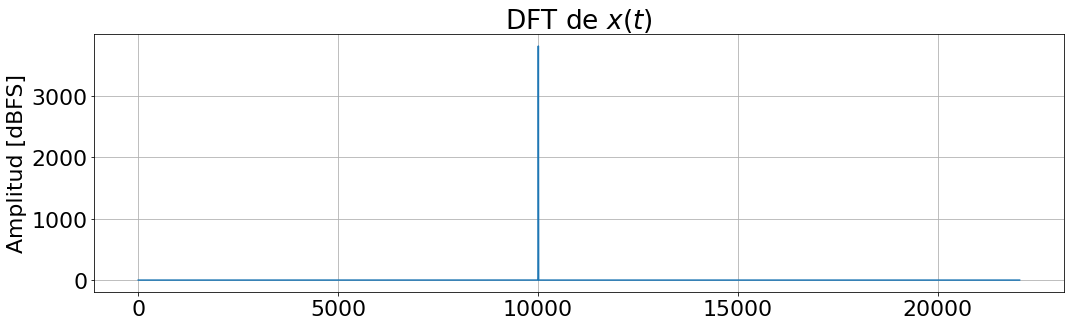

In [12]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(1, 1, figsize=[15, 5])
axs.plot(freqs_ej3, np.abs(fft_ej3))
axs.set_title('DFT de $x(t)$')

fig.tight_layout()

axs.set(ylabel='Amplitud [dBFS]')
axs.grid()
    
plt.show()

---

## Filtro Media Móvil
### <u>Ejercicio 4</u>:
A partir de la respuesta al impulso del filtro de media móvil, dada en el inciso 6 del TP1, determinar el valor particular de M para que el filtro deje pasar la componente de 10 kHz de la señal del punto 1, atenuada no más de -3 dB. Graficar la magnitud de la respuesta en frecuencia del filtro y de la señal filtrada.

---

## Convolución mediante DFT
### <u>Ejercicio 5</u>:

Calcular la convolución lineal del punto 7 del TP1, pero esta vez utilizando el algoritmo de la DFT. Determinar el largo que deben tener las señales a convolucionar para que el resultado de utilizar una convolución circular vía DFT sea equivalente a la convolución lineal.

## <u>Respuesta</u>: 

Para rearmar la senal utilizada en el punto 7 del TP1, se utiliza $x_1$ y $x_2$ de este TP (ya que son las mismas) y se crea $x_3$ para agregarla.

In [16]:
# Senal del ejercicio 7 del TP1
ej5_f3 = 500
ej5_u3 = 0.7
ej5_sigma3 = 0.07
ej5_exp3 = ((vector_t-ej5_u3)**2)/(2*(ej5_sigma3**2))

ej5_x3 = np.sin(2*np.pi*f3*vector_t)*(np.e**(-exp3))
ej5_x = x1+x2+ej5_x3

# Generacion de Ventana rectangular de largo M
M = 10
ej5_rectangular = windows.boxcar(M)


El largo que debe tener la senal para ser una convolucion lineal esta determinado por el largo de ambas senales.
En este caso, llamaremos L al largo de la senal x(t) y M al largo de la ventana.
Para que este algoritmo se comporte como una convolucion lineal, se debe cumplir que:<br><br> 

<center>$N = M + L -1$</center>

Siendo N la longitud de la convolucion. A continuacion, se realizaran los calculos con el agregado de ceros.

Por otro lado, la convolucion por DFT es parte de las propiedades dadas por la transformada de Fourier, quedando de esta forma:<br><br>

<center>$\mathscr{F}\{x(t)*h(t)\} = X[n]H[n]$</center>


In [15]:
# DFT de las senales
ej5_dft_rectangular = np.fft.fft(rectangular)
ej5_dft_x = np.fft.fft(ej5_x)

# Agregado de ceros
# ???????????

# Convolucion circular por DFT
ej5_conv = x

---

## Derivación en frecuencia
### <u>Ejercicio 6</u>:
Los métodos numéricos para resolver ecuaciones diferenciales deben poder calcular las derivadas mediante algún método aproximado. Uno de los más métodos más conocidos es el de diferencias finitas, que si bien es simple, no siempre tiene la precisión deseada. Otro método, es el de la diferenciación en frecuencia que hace uso de las propiedades de la transformada de Fourier. En este punto deberán tomar la señal $x_2(t)$ de un 1 segundo de duración y muestreada a $Fs=44.1 kHz$:

$x_2 (t) = cos(2 \pi f_2 t) e^{- \frac{(t-\mu_2)^2}{2\sigma_2^2}}\;\;\;\;\;\;\;\;f_2 = 10kHz$&emsp;$\mu_2 = 0.2s$&emsp;$\sigma_2 = 0.05s$ \

y calcular la derivada analítica, la primera diferencia hacia adelante (forward) y la derivada por el
método de la transformada de Fourier. Graficar los resultados y compara la aproximación de la
derivada por los dos métodos numéricos. Se puede seguir la referencia [4] para la implementación.


---

## Transformada en tiempo corto de Fourier (STFT) - Espectrograma
### <u>Ejercicio 7</u>:
A la señal del inciso 1 de este TP calcular y graficar la magnitud en dB y la fase de su STFT. Realizar tres gráficos cambiando el tipo de ventana y el largo del cálculo de la FFT. Determinar alguna combinación de las tres anteriores que sea (parezca) mejor para representar a la señal en estudio.